In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [6]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")

In [7]:
df_dummies = pd.get_dummies(df)
df_dummies = df_dummies.drop(["y_no", "duration"], axis=1)

In [8]:
features = list(df_dummies.drop(["y_yes"], axis = 1))
target = "y_yes"

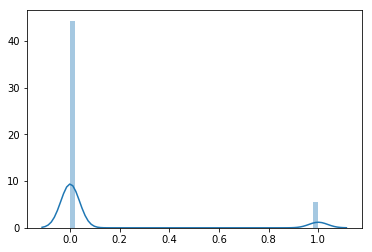

In [9]:
# Ploting Histogram
x = np.array(df_dummies["y_yes"])
#sns.distplot(x, kde = False, rug = False);
sns_plot =  sns.distplot(x)

In [12]:
clf = RandomForestClassifier(n_estimators = 10)

# WATCH Overwriting variable "x"
x = df_dummies.drop("y_yes", axis = 1)
y = df_dummies["y_yes"]

cross_val_array = cross_val_score(clf, x, y, cv = 10)

In [14]:
print("Results of 10-fold stratified cross-validation")
print(cross_val_array)

Results of 10-fold stratified cross-validation
[0.8873513  0.87594076 0.22384074 0.81160476 0.74314154 0.4474387
 0.30031561 0.11653314 0.33802817 0.21782419]


In [15]:
clf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
importances = clf.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in clf.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(x.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. age (0.160931)
2. euribor3m (0.105666)
3. campaign (0.083186)
4. nr.employed (0.071106)
5. cons.conf.idx (0.029465)
6. pdays (0.028913)
7. emp.var.rate (0.025118)
8. housing_yes (0.022032)
9. housing_no (0.021117)
10. poutcome_success (0.019898)
11. cons.price.idx (0.018751)
12. job_admin. (0.018253)
13. marital_married (0.017539)
14. education_high.school (0.016319)
15. education_university.degree (0.016194)
16. marital_single (0.015466)
17. job_technician (0.015197)
18. day_of_week_tue (0.014955)
19. loan_no (0.014554)
20. day_of_week_wed (0.014050)
21. day_of_week_mon (0.014023)
22. loan_yes (0.013255)
23. day_of_week_fri (0.013018)
24. day_of_week_thu (0.012912)
25. previous (0.012852)
26. job_blue-collar (0.012243)
27. education_professional.course (0.011846)
28. education_basic.9y (0.010817)
29. marital_divorced (0.010573)
30. poutcome_nonexistent (0.010264)
31. job_services (0.009491)
32. job_management (0.009313)
33. education_basic.4y (0.008203)
34. poutcom

(0, 0.17468179148437993)

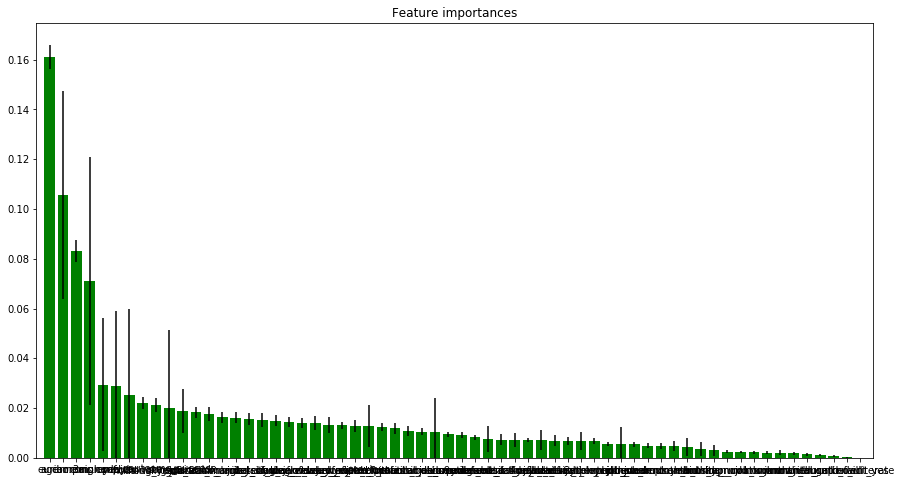

In [21]:
# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(
    range(x.shape[1]), 
    importances[indices],
    color = "g", 
    yerr = std[indices], 
    align = "center"
)
plt.xticks(range(x.shape[1]), np.array(features)[indices])
plt.xlim([-1, x.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

# Computing and Printing the Confusion Matrix

In [22]:
# Compute confusion matrix
y_pred = clf.predict(x)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Defining the method to plot the Confusion Matrix 

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[1.   0.  ]
 [0.14 0.86]]


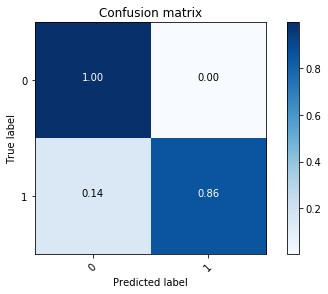

In [24]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = True,
title='Confusion matrix')